<a href="https://colab.research.google.com/github/PawanPPatil/F4F/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Farmers Call_Data.xlsx to Farmers Call_Data (15).xlsx


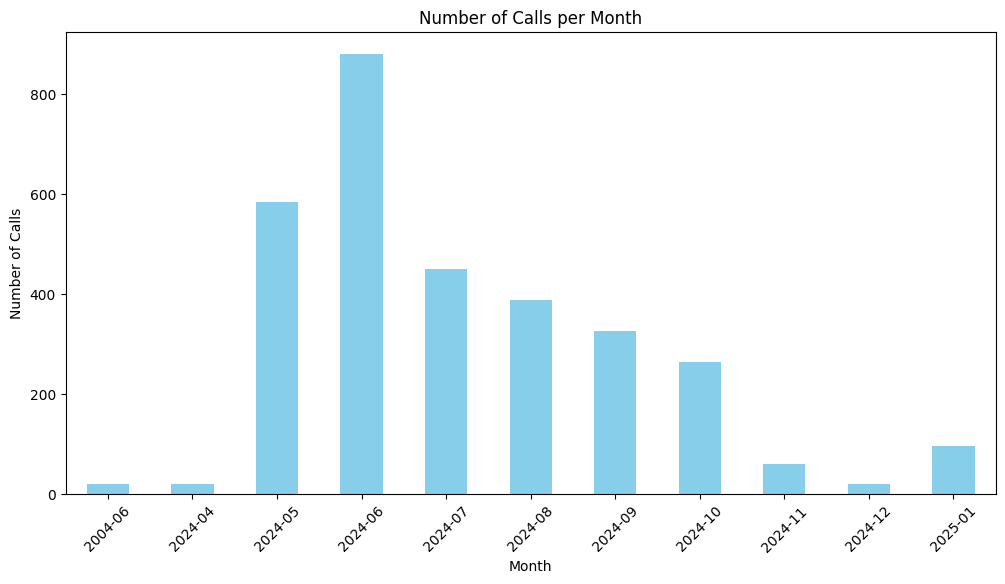

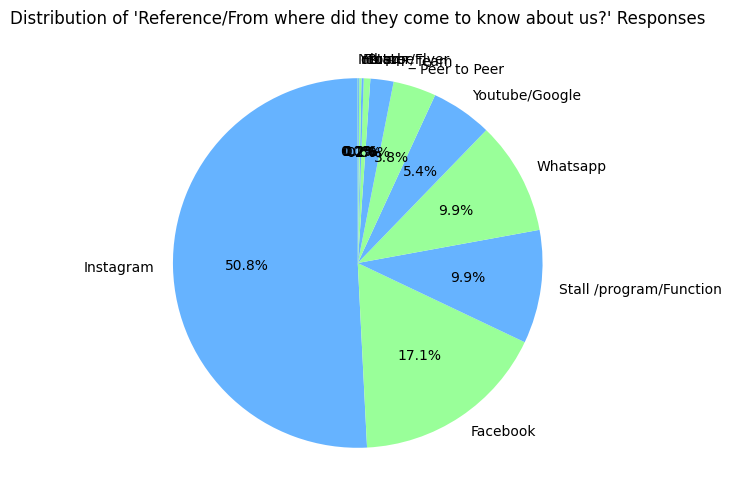

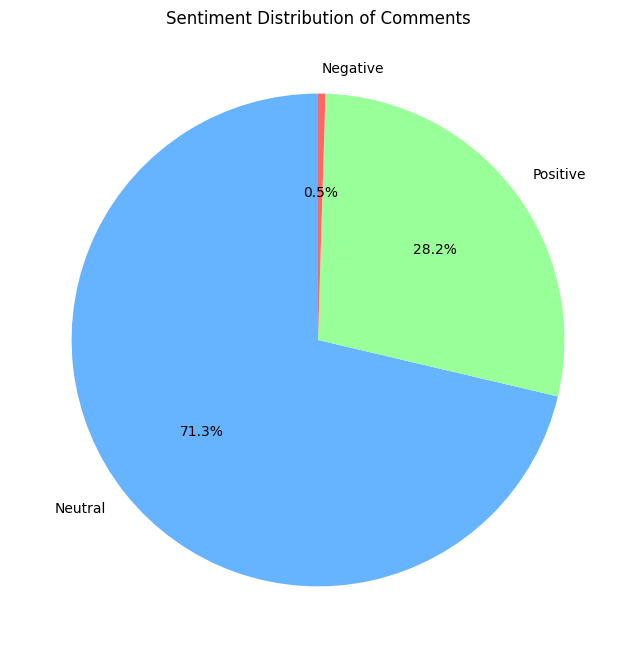

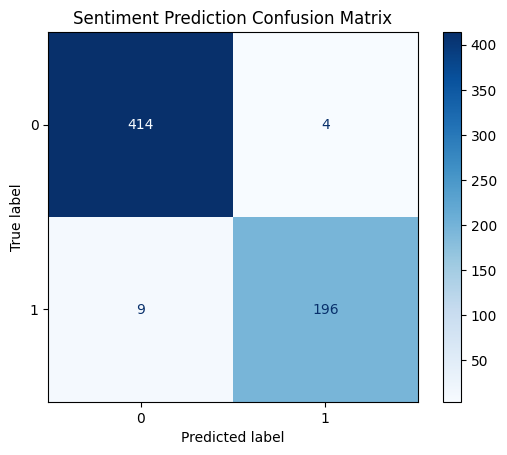

In [21]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from datetime import datetime

# Load your dataset (Assuming it's a CSV file uploaded in Colab)
from google.colab import files
uploaded = files.upload()

# Read the file after upload
data = pd.read_excel('Farmers Call_Data.xlsx')

# 1. Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Coerce errors will turn invalid parsing into NaT

# 2. Numerical Insights from 'Date' - Calls per month
data['Month'] = data['Date'].dt.to_period('M')  # Extract month-year
calls_per_month = data['Month'].value_counts().sort_index()

# Plot calls per month
plt.figure(figsize=(12,6))
calls_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()



# 3. Numerical Insights from 'Reference/From where did they come to know about us?' - Yes/No distribution
about_us_counts = data['Reference/From where did they come to know about us?'].value_counts()

# Plot distribution of Yes/No in 'Reference/From where did they come to know about us?'
plt.figure(figsize=(6,6))
about_us_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title("Distribution of 'Reference/From where did they come to know about us?' Responses")
plt.ylabel('')
plt.show()

# 4. Text Preprocessing for 'comments'
def preprocess_comments(text):
    # Remove punctuation and convert to lower case
    text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text.lower()])

    # Tokenize by splitting the text on whitespace
    words = text.split()

    # Remove stopwords (simple list of common words)
    stopwords = set([
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
        'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
        'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
        'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
        'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
        'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up',
        'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
        'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
        'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
        'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven',
        'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
    ])
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

data['cleaned_comments'] = data['comments'].apply(preprocess_comments)

# 5. Word Frequency Analysis using WordCloud
text = ' '.join(data['cleaned_comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
#plt.figure(figsize=(12,6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

# 6. Sentiment Analysis using TextBlob

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming the data is loaded into the 'data' dataframe with a 'comments' column

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'comments' column
data['sentiment'] = data['comments'].apply(calculate_sentiment)

# Classify sentiment into Positive, Neutral, and Negative
def classify_sentiment(sentiment):
    if sentiment > 0.1:
        return 'Positive'
    elif sentiment < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to each sentiment value
data['sentiment_label'] = data['sentiment'].apply(classify_sentiment)

# Count the number of comments in each category
sentiment_counts = data['sentiment_label'].value_counts()

# Plot a pie chart for sentiment distribution
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff6666'], startangle=90)
plt.title('Sentiment Distribution of Comments')
plt.show()

# 7. Optional: Train a Sentiment Classification Model
# First, you need labeled sentiment data (positive/negative/neutral). For simplicity, we'll assume a binary sentiment (positive/negative).

# Create sentiment labels (this is a very basic approach for demonstration)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Split data into train/test sets
X = data['cleaned_comments']
y = data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing comments with CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict sentiments on test data
y_pred = model.predict(X_test_vec)

# Confusion matrix to evaluate model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Sentiment Prediction Confusion Matrix')
plt.show()
